In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import ast

In [3]:
def datetime2index(data,time_clo):
    # Converts dates to a 'datetime' class and sets it as an index
    data[time_clo] = pd.to_datetime(data[time_clo])
    data.set_index(time_clo, inplace=True)
    try:
        data = data.drop("Unnamed: 0",axis=1) # drop unnamed column
    except:
        return data
    return data

In [4]:
# load datas
datas_distilbert = pd.read_csv('datas_distilbert.csv')
datas_FinBERT = pd.read_csv('./datas_FinBERT.csv')
datas_twitter = pd.read_csv('./datas_twitter_roberta.csv')
datas_finbert_tone = pd.read_csv('./datas_finbert_tone.csv')
print("len of distilbert   1:",len(datas_distilbert))
print("len of FinBERT      2:",len(datas_FinBERT))
print("len of twitter      3:",len(datas_twitter))
print("len of finbert_tone 4:",len(datas_finbert_tone))
print("When merging data, please select the data with the smallest length to merge.")
# Load labels
monthly_labels = pd.read_csv("./monthly_merged_label.csv")
# Converts dates to a 'datetime' class and sets it as an index
datas_distilbert = datetime2index(datas_distilbert,'times')
datas_FinBERT = datetime2index(datas_FinBERT,'times')
datas_twitter = datetime2index(datas_twitter,'times')
datas_finbert_tone = datetime2index(datas_finbert_tone,'times')

monthly_labels = datetime2index(monthly_labels,'observation_date')

len of distilbert   1: 1765
len of FinBERT      2: 1277
len of twitter      3: 1944
len of finbert_tone 4: 1308
When merging data, please select the data with the smallest length to merge.


In [5]:
# Add suffixes to columns to avoid conflicts when merging
datas_distilbert = datas_distilbert.add_suffix('_1')
datas_FinBERT = datas_FinBERT.add_suffix('_2')
datas_twitter = datas_twitter.add_suffix('_3')
datas_finbert_tone = datas_finbert_tone.add_suffix('_4')

In [6]:
# Select the data merge with the smallest length, which is currently：FinBERT
data = datas_FinBERT.join([datas_twitter,datas_distilbert,datas_finbert_tone],how='left')
print('len of data',len(data))
missing_values_per_column = data.isna().sum()
print(missing_values_per_column)
data.fillna("[0]", inplace=True) # In order for the following to be parsed correctly as a list, this needs to be populated with '[0]'
missing_values_per_column = data.isna().sum()
print(missing_values_per_column)

len of data 1277
sentiment_scores_2    0
sentiment_scores_3    0
sentiment_scores_1    0
sentiment_scores_4    0
dtype: int64
sentiment_scores_2    0
sentiment_scores_3    0
sentiment_scores_1    0
sentiment_scores_4    0
dtype: int64


In [7]:
# Remove zeros from the list and compute the statistic
'''
@calculate_statistics
lst:An iterable object such as a List/Series
'''
def calculate_statistics(lst):
    # 移除列表中的0
    cleaned_list = [x for x in lst if x != 0]
    
    # 如果清理后的列表不为空，则计算统计量
    if cleaned_list:
        mean = np.mean(cleaned_list)
        std = np.std(cleaned_list)
        # 在这里添加更多统计量
    else:
        # 如果清理后的列表为空，则返回NaN
        mean = np.nan
        std = np.nan
    return mean, std


# Applying functions to each statistical column
for col in ['sentiment_scores_1', 'sentiment_scores_2', 'sentiment_scores_3', 'sentiment_scores_4']:
    # Parsing as a list
    data[col] = data[col].apply(ast.literal_eval)
    # Split the results into two new columns
    data[f'{col}_mean'], data[f'{col}_std'] = zip(*data[col].apply(calculate_statistics))

# check the results
data.head()

,sentiment_scores_2,sentiment_scores_3,sentiment_scores_1,sentiment_scores_4,sentiment_scores_1_mean,sentiment_scores_1_std,sentiment_scores_2_mean,sentiment_scores_2_std,sentiment_scores_3_mean,sentiment_scores_3_std,sentiment_scores_4_mean,sentiment_scores_4_std
times,,,,,,,,,,,,
2006-10-20,[-0.15854748384033462],[-0.15854748384033462],[-0.9542459575923036],[0.9061552542202164],-0.954246,0.000000,-0.158547,0.000000,-0.158547,0.000000,0.906155,0.000000
2006-10-21,[0.0],[0.0],[-0.9570303238355197],[0.0],-0.957030,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-23,"[-0.6818488136581753, 0.0]","[-0.6818488136581753, 0.0]","[-0.9927112082677888, -0.9917036611206678]","[0.0, 0.0]",-0.992207,0.000504,-0.681849,0.000000,-0.681849,0.000000,NaN,NaN
2006-10-24,"[-0.4595161032676697, -0.813238263130188, 0.87...","[-0.4595161032676697, -0.813238263130188, 0.87...","[-0.9964825129508972, -0.9983683228492737, -0....","[0.0, 0.0, 0.9154197667421919, -0.421987705974...",-0.562342,0.473294,-0.018280,0.659118,-0.018280,0.659118,0.246716,0.668704
2006-10-25,"[-0.7924697727853367, -0.5260841946532256]","[-0.7924697727853367, -0.5260841946532256]","[-0.9882315009590087, -0.2986226595231216]","[-0.3838500932949345, 0.0]",-0.643427,0.344804,-0.659277,0.133193,-0.659277,0.133193,-0.383850,0.000000


In [8]:
# Completion of missing dates

# 1. Create a DataFrame with all the dates.
all_dates = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
all_dates_df = pd.DataFrame(index=all_dates)

# 2. Merging data
data = all_dates_df.join(data, how='left')
missing_values_per_column = data.isna().sum()
print('len of data:',len(data),'\nmissing values:\n',missing_values_per_column)

# Completion of statistics for missing dates with 0
data = data.fillna(0)

len of data: 1959 
missing values:
 sentiment_scores_2          682
sentiment_scores_3          682
sentiment_scores_1          682
sentiment_scores_4          682
sentiment_scores_1_mean     705
sentiment_scores_1_std      705
sentiment_scores_2_mean     859
sentiment_scores_2_std      859
sentiment_scores_3_mean     859
sentiment_scores_3_std      859
sentiment_scores_4_mean    1114
sentiment_scores_4_std     1114
dtype: int64


In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Prepare the inputs
input_data = []
for month, group in data.groupby(pd.Grouper(freq='M')):
    # monthly_feature = group[['mean', 'median', 'max', 'min', 'std', 'rolling_mean', 'rolling_std', 'change_rate']].values
    monthly_feature = group[['sentiment_scores_1_mean',
       'sentiment_scores_1_std', 'sentiment_scores_2_mean',
       'sentiment_scores_2_std', 'sentiment_scores_3_mean',
       'sentiment_scores_3_std', 'sentiment_scores_4_mean',
       'sentiment_scores_4_std']].values
    input_data.append(monthly_feature)

# 使用 pad_sequences 进行填充以确保每个月的数据长度相同
input_data_padded = pad_sequences(input_data, padding='post', dtype='float32')
# 检查填充后的数据形状
print(input_data_padded.shape)

(65, 31, 8)


In [9]:
# # Feature normalisation, selecting columns to be normalised
# # columns_to_scale = ['mean', 'std', 'rolling_mean', 'rolling_std']
# # Initialising the standardiser
# scaler = MinMaxScaler()
# # Apply standardisation to selected columns
# data = scaler.fit_transform(data)
# data.head()

In [10]:
from pandas.tseries.offsets import MonthEnd
#  确定时间范围
start_date = data.index.min() # 第一个月（2006-10）因为没有1号的数据，正好取不到标签里2006-10月的标签
end_date = data.index.max()  + MonthEnd(1) # 用过去预测未来，所以需要多搞一个月的标签
print(start_date,end_date)
# 筛选对应时间范围内的标签
monthly_labels = monthly_labels.loc[start_date:end_date]
monthly_labels.head()

2006-10-20 00:00:00 2012-03-31 00:00:00


,PAYEMS,CE16OV,INDPRO,CMRMT,PCEC96,W875RX1
observation_date,,,,,,
2006-11-01,137069.0,145534.0,99.0969,1215059.0,NaN,11624.9
2006-12-01,137253.0,145970.0,100.1122,1234494.0,NaN,11683.5
2007-01-01,137476.0,146028.0,99.7571,1226965.0,11181.0,11666.7
2007-02-01,137554.0,146057.0,100.7275,1234327.0,11178.2,11713.7
2007-03-01,137781.0,146320.0,100.9023,1235875.0,11190.7,11765.5


In [12]:
# select the predicted label
label = monthly_labels['INDPRO']
label.shape # = (65,)
# Initialising a MinMaxScater
scaler = MinMaxScaler()
label_scaled = scaler.fit_transform(label.values.reshape(-1, 1))
label_scaled[:5]


array([[0.81992418],
       [0.87771807],
       [0.85750472],
       [0.91274278],
       [0.92269291]])

In [13]:
def plot_model(model,model_name,X_combined,y_combined):
    # 使用某个模型进行预测,nn_model,rf_model,lr_model
    predicted = model.predict(X_combined)
    # 将预测结果转换为一维数组方便绘图
    predicted = predicted.ravel()
    # 绘制真实值和预测值
    plt.figure(figsize=(10,6))
    plt.plot(y_combined, label='Actual',marker='o', linestyle='-')
    plt.plot(predicted, label='Predicted', marker='x', linestyle='-')
    plt.title(f"{model_name} Prediction vs Actual")
    plt.xlabel("Observations")
    plt.ylabel("Target")
    plt.legend()
    plt.show()

def plt_history(history):
    # 绘制训练损失和验证损失
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training Curve')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mse, rmse, r2

In [14]:
# The datas and labels for model training
X = input_data_padded
y = label_scaled

# 留出验证，划分训练集和测试集
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [30]:
# 这里实现传统模型
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 将数据展平
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [17]:
# # 线性回归
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)
# # 线性回归模型评估
# lr_mse, lr_rmse, lr_r2 = evaluate_model(lr_model, X_test, y_test)
# print("Linear Regression - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(lr_mse, lr_rmse, lr_r2))
# plot_model(lr_model,'lr_model',X.reshape(X.shape[0],-1),y)

c:\Users\15163\.conda\envs\FDH\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - MSE: 0.1063, RMSE: 0.3260, R2: -0.0746


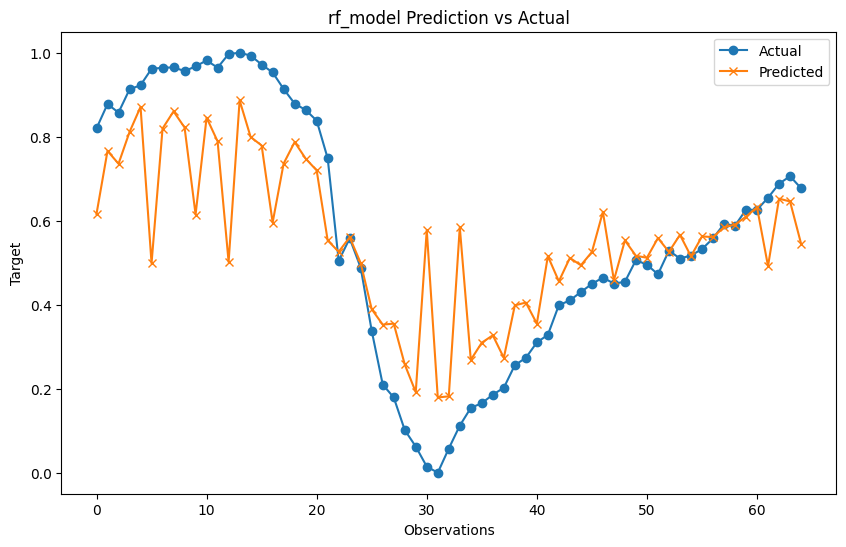

In [38]:
randoms = [42,409,523,218,404]
for random in random_state:
    # 随机森林
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=404)
    rf_model.fit(X_train, y_train)
    # 随机森林模型评估
    rf_mse, rf_rmse, rf_r2 = evaluate_model(rf_model, X_test, y_test)
    print("Random Forest - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(rf_mse, rf_rmse, rf_r2))
    plot_model(rf_model,'rf_model',X.reshape(X.shape[0],-1),y)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Input,LSTM, Dense, Masking,BatchNormalization,Dropout
from sklearn.model_selection import train_test_split,TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,Conv2D,MaxPooling2D

In [29]:
# Dense model with 留出验证
# Flatten the input data
# Build a simple fully connected neural network
nn_model = Sequential([
    Masking(mask_value=0., input_shape=(X_train.shape[1],)),  # 添加掩码层
    Dense(128, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    BatchNormalization(),  # 添加批量归一化层
    Dense(32),
    Dense(1,activation='sigmoid')  # Output layer
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = nn_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))
plt_history(history)
# Evaluate the model
y_pred = nn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
plot_model(nn_model, "nn",X.reshape(X.shape[0],-1),y)

Epoch 1/20


ValueError: in user code:

    File "c:\Users\15163\.conda\envs\FDH\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\15163\.conda\envs\FDH\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\15163\.conda\envs\FDH\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\15163\.conda\envs\FDH\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\15163\.conda\envs\FDH\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\15163\.conda\envs\FDH\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "dense_5" is incompatible with the layer: expected axis -1 of input shape to have value 31, but received input with shape (None, 31, 8, 1)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 31, 8, 1), dtype=float32)
      • training=True
      • mask=None


In [ ]:
# # 定义时间序列交叉验证 * LSTM
# tscv = TimeSeriesSplit(n_splits=10) 

# # 存储每次预测的真实值和预测值
# true_values = []
# predictions = []

# # 分割数据
# for train_index, test_index in tscv.split(input_data_padded):
#     X_train, X_test = input_data_padded[train_index], input_data_padded[test_index]
#     y_train, y_test = filtered_labels_scaled[train_index], filtered_labels_scaled[test_index]
#     # LSTM模型
#     lstm_model = Sequential([
#         Masking(mask_value=0., input_shape=(X_train.shape[1], X_train.shape[2])),  # 添加掩码层
#         LSTM(40, activation='relu'),  # LSTM层，50个单元
#         # BatchNormalization(),  # 添加批量归一化层
#         Dense(20,activation='relu'),
#         Dropout(0.5),
#         Dense(1,activation='sigmoid')  # 输出层，单个输出值
#     ])

#     # # 设置自定义学习率
#     # learning_rate = 0.0001 
#     # # 创建优化器实例，设置学习率
#     # optimizer = Adam(learning_rate=learning_rate)
#     # 编译模型，使用自定义优化器
#     lstm_model.compile(optimizer='adam', loss='mse')

#     # 训练模型
#     history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2,verbose=0)
#     # 评估模型
#     loss = lstm_model.evaluate(X_test, y_test)
#     y_pred = lstm_model.predict(X_test)
#     # 将预测值和真实值存储起来
#     predictions.extend(y_pred)
#     true_values.extend(y_test)
    
# # for i in range(len(predictions)):
# #     if predictions[i] < 0:
# #         predictions[i] = 0
# plt.figure(figsize=(12, 6))
# years = range(len(predictions))  # 确保年份范围正确
# # 绘制真实严重性
# plt.plot(years, true_values, label='True label', marker='o', linestyle='-')
# # 绘制预测严重性
# plt.plot(years, predictions, label='Predicted label', marker='x', linestyle='-')
# plt.xlabel('Year')
# plt.ylabel('CMART')
# plt.title('True vs Predicted CMART  by LSTM model')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [27]:
# 划分数据集为训练集和测试集,留出验证
X_train, X_test, y_train, y_test = train_test_split(X.reshape(X.shape[0],X.shape[1],X.shape[2],1), y, test_size=0.2, random_state=42)
print(X_train.shape)

(52, 31, 8, 1)



Epoch 1/50
4/4 [==============================] - 1s 76ms/step - loss: 0.1839 - val_loss: 0.0972
Epoch 2/50
4/4 [==============================] - 0s 24ms/step - loss: 0.0883 - val_loss: 0.0859
Epoch 3/50
4/4 [==============================] - 0s 21ms/step - loss: 0.0652 - val_loss: 0.0825
Epoch 4/50
4/4 [==============================] - 0s 19ms/step - loss: 0.0598 - val_loss: 0.0810
Epoch 5/50
4/4 [==============================] - 0s 22ms/step - loss: 0.0477 - val_loss: 0.0780
Epoch 6/50
4/4 [==============================] - 0s 19ms/step - loss: 0.0391 - val_loss: 0.0745
Epoch 7/50
4/4 [==============================] - 0s 20ms/step - loss: 0.0322 - val_loss: 0.0675
Epoch 8/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0251 - val_loss: 0.0770
Epoch 9/50
4/4 [==============================] - 0s 18ms/step - loss: 0.0212 - val_loss: 0.0642
Epoch 10/50
4/4 [==============================] - 0s 27ms/step - loss: 0.0209 - val_loss: 0.0857
Epoch 11/50
4/4 [===========

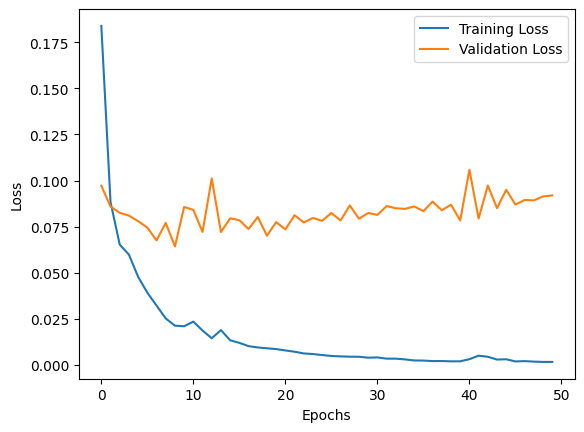

3/3 [==============================] - 0s 3ms/step


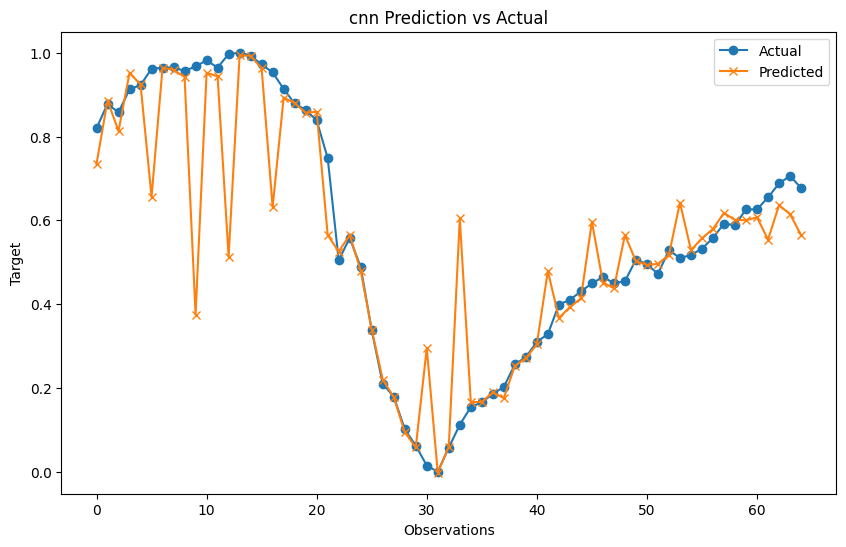

In [28]:
# 创建序贯模型
cnn_model = Sequential()
cnn_model.add(Masking(mask_value=0.,input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
# 添加一维卷积层，设置卷积核大小为 (7, 1)，表示在不同时间点上进行卷积
cnn_model.add(Conv2D(filters=32, kernel_size=(7,1), activation='relu'))
# cnn_model.add(Conv2D(filters=32, kernel_size=(7,1), activation='relu',input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
# 添加池化层，可以选择最大池化或平均池化
cnn_model.add(MaxPooling2D(pool_size=2))
# 展平层
cnn_model.add(Flatten())
# 添加全连接层
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='linear'))  # 线性激活函数用于回归问题
# 编译模型
cnn_model.compile(optimizer='adam', loss='mean_squared_error')  # 使用均方误差作为损失函数

# 训练模型
history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# 查看训练过程中的损失变化
import matplotlib.pyplot as plt

# 绘制训练损失和验证损失的曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plot_model(cnn_model, "cnn", X, y)